# Data Analysis using NLTK

- Calcuate the tf-idf matrix to figure out how much weightage a word is to the document
- filter out uneccessary words like 'the' etc
- group the words into abstract topics, which are groups of words with unseen categories

In [1]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

df = pd.read_csv("initial_transit_cleaned.csv")
preprocessed = [" ".join(RegexpTokenizer(r'\w+').tokenize(df.transit[idx])) for idx in df.index]
custom_stop_words = [] # add in specific words if needed, for now use default stop words from nltk
my_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1,1), 
                            stop_words = my_stop_words)

tfidf = vectorizer.fit_transform(preprocessed)
print(f"Created document-term matrix of size ({tfidf.shape[0]} x {tfidf.shape[1]})")

Created document-term matrix of size (14468 x 8568)


In [9]:
from sklearn import decomposition

nmf = decomposition.NMF(init = 'nndsvd', n_components = 5, max_iter = 200) # specific n_components means specify number of abstract topics to group
W = nmf.fit_transform(tfidf)
H = nmf.components_
print("Generated Width (document-topic)) matrix of size %s and Height (topic-word) matrix of size %s" % ( str(W.shape), str(H.shape)))

feature_names = vectorizer.get_feature_names()
n_top_words = 15 # find top 10 common words

# Print top words in each topic
for topic_idx, topic in enumerate(H):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Generated Width (document-topic)) matrix of size (14468, 5) and Height (topic-word) matrix of size (5, 8568)
Topic #0:
minutes walk minute tram city st away 10 street stop 15 cbd kilda station takes

Topic #1:
free tram cross southern melbourne zone station airport apartment just skybus building central right located

Topic #2:
transport public parking trams car available trains buses street close easy city access doorstep use

Topic #3:
bus train station walking distance stop close shopping stops house centre nearest line stations drive

Topic #4:
mins min walk 10 15 tram drive station 20 stop cbd city 30 away train



# Data visualisation using Word Cloud

- according to these abstract topics, find the most common/weighted words per topic
- put these words into a word cloud

In [11]:
new_df = pd.DataFrame({"feature_name": feature_names})

for topic_idx, topic in enumerate(H):
    new_df["topic_" + str(topic_idx)] = topic

mylist = list(new_df.itertuples())

# add more topics if needed
transit_topic1 = []
transit_topic2 = []
transit_topic3 = []
transit_topic4 = []
transit_topic5 = []

for order_id, key, num1, num2, num3, num4, num5 in mylist:
    transit_topic1.append((key, num1))
    transit_topic2.append((key, num2))
    transit_topic3.append((key, num3))
    transit_topic4.append((key, num4))
    transit_topic5.append((key, num5))

transit_topic1 = sorted(transit_topic1, key=lambda myword: myword[1], reverse=True)
transit_topic2 = sorted(transit_topic2, key=lambda myword: myword[1], reverse=True)
transit_topic3 = sorted(transit_topic3, key=lambda myword: myword[1], reverse=True)
transit_topic4 = sorted(transit_topic4, key=lambda myword: myword[1], reverse=True)
transit_topic5 = sorted(transit_topic5, key=lambda myword: myword[1], reverse=True)

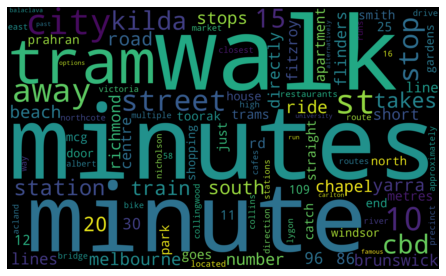

<Figure size 16000x16000 with 0 Axes>

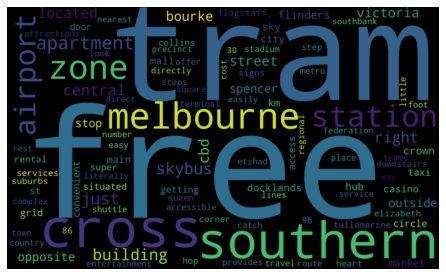

<Figure size 16000x16000 with 0 Axes>

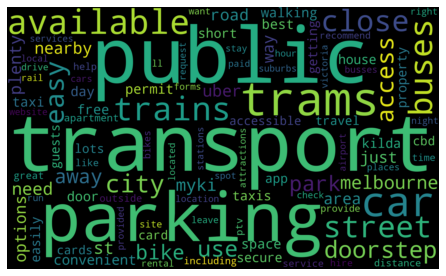

<Figure size 16000x16000 with 0 Axes>

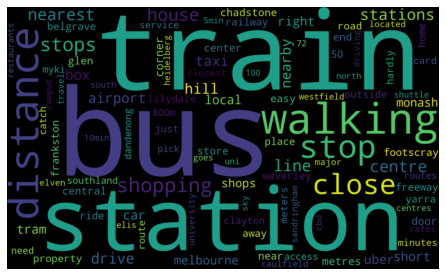

<Figure size 16000x16000 with 0 Axes>

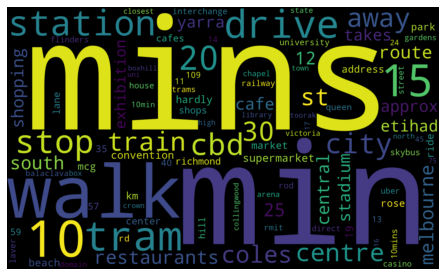

<Figure size 16000x16000 with 0 Axes>

In [12]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

%matplotlib inline

def draw_wordcloud(dict, topic_number):
    wc = WordCloud(max_words=100, width=1980, height=1200)    
    wordcloud = wc.generate_from_frequencies(dict)
    # wordcloud.to_file("top_1000_transit_words.png")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.figure(figsize=(32,32), dpi=500)  
    plt.show()

draw_wordcloud(dict(transit_topic1), topic_number=1)
draw_wordcloud(dict(transit_topic2), topic_number=2)
draw_wordcloud(dict(transit_topic3), topic_number=3)
draw_wordcloud(dict(transit_topic4), topic_number=4)
draw_wordcloud(dict(transit_topic5), topic_number=5)